# KNN: Iris Dataset

## Loading Packages

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

# KNN
from sklearn.neighbors import KNeighborsClassifier

from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Loading Iris Dataset

In [2]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data,
                       columns=iris.feature_names)

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Data Preparation

We split the data into two: train and test set.


#### Training Set

In [3]:
iris_train_df = iris_df.sample(frac = 0.75)
iris_train_y = iris.target[iris_train_df.index]

iris_train_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
95,5.7,3.0,4.2,1.2
147,6.5,3.0,5.2,2.0
140,6.7,3.1,5.6,2.4
17,5.1,3.5,1.4,0.3
109,7.2,3.6,6.1,2.5


#### Test Set

In [4]:
iris_test_df = iris_df.drop(iris_train_df.index)
iris_test_y = iris.target[iris_test_df.index]

## Creating and Training the Model

#### k = 3

In [5]:
knn = KNeighborsClassifier(n_neighbors=3) # creating model where k = 3
knn.fit(iris_train_df, iris_train_y) # training the model using the train set

knn3_prediction = knn.predict(iris_test_df)
accuracy = knn.score(iris_test_df, iris_test_y)
accuracy

0.9473684210526315

In [6]:
# Just for visualization
def plot_confusion_matrix(model, X_test, y_test):
    """Generates and plots a confusion matrix, given a model."""
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
    disp.plot(cmap='BuPu')
    plt.show()

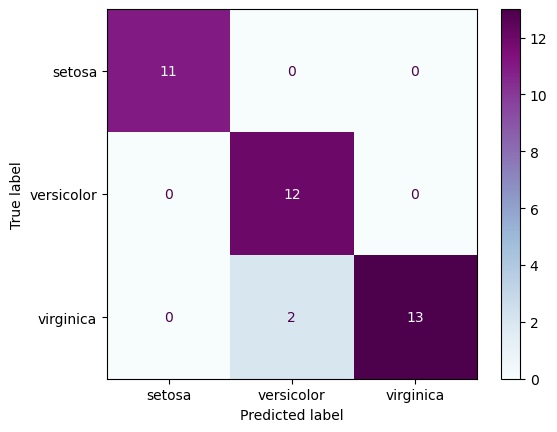

In [7]:
plot_confusion_matrix(knn, iris_test_df, iris_test_y)